In [2]:
! dir

 Volume in drive D is Work
 Volume Serial Number is B437-085E

 Directory of D:\Python_Codes\Customer Segmentation

10/17/2020  03:47 PM    <DIR>          .
10/17/2020  03:47 PM    <DIR>          ..
10/17/2020  03:47 PM    <DIR>          .ipynb_checkpoints
10/17/2020  03:47 PM                72 customer_segmentation.ipynb
10/16/2020  03:11 PM        23,715,344 Online Retail.xlsx
               2 File(s)     23,715,416 bytes
               3 Dir(s)  65,641,779,200 bytes free


In [5]:
! pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel("Online Retail.xlsx")

In [7]:
df.shape

(541909, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df[df['CustomerID'].notna()].shape

(406829, 8)

In [10]:
df=df[df['CustomerID'].notna()]

In [11]:
# Sampling the Dataset

df_fix=df.sample(n=10000,random_state=42)

In [12]:
df_fix.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom


### To segmenting customer, there are some metrics that we can use, such as when the customer buy the product for last time, how frequent the customer buy the product, and how much the customer pays for the product. We will call this segmentation as RFM segmentation.

In [13]:
df_fix['InvoiceDate']=pd.to_datetime(arg=df_fix['InvoiceDate'])

In [14]:
df_fix['TotalSum']=df_fix["Quantity"]*df_fix["UnitPrice"]

In [15]:
df_fix.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom,15.9
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom,15.8
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom,-3.4
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom,6.6
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom,13.2


In [16]:
import datetime

In [18]:
datetime.timedelta(days=1)

datetime.timedelta(1)

In [19]:
max(df_fix['InvoiceDate'])

Timestamp('2011-12-09 12:16:00')

In [23]:
df_fix['InvoiceDate'].max()

Timestamp('2011-12-09 12:16:00')

In [21]:
snapshot_date=max(df_fix['InvoiceDate'])+datetime.timedelta(days=1)

In [22]:
snapshot_date

Timestamp('2011-12-10 12:16:00')

In [41]:
df_fix.groupby(by='CustomerID').agg({'InvoiceDate':lambda x: (snapshot_date-x.max()).days})

,InvoiceDate
CustomerID,
12347.0,39
12348.0,249
12349.0,19
12352.0,72
12354.0,232
...,...
18265.0,72
18272.0,2
18274.0,18


In [47]:
customers=df_fix.groupby(by='CustomerID').agg({'InvoiceDate':lambda x: (snapshot_date-x.max()).days,
                                     'InvoiceNo': 'count',
                                      'TotalSum': lambda x : sum(x)})

In [48]:
customers.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [49]:
customers.shape

(2690, 3)

In [51]:
customers=customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'})

In [52]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [53]:
# Managing the skewness of the variables

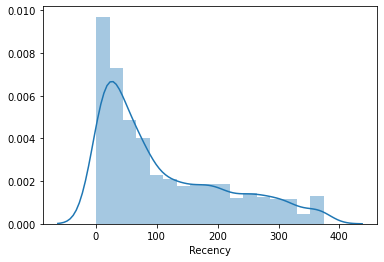

In [55]:
sns.distplot(a=customers['Recency'])

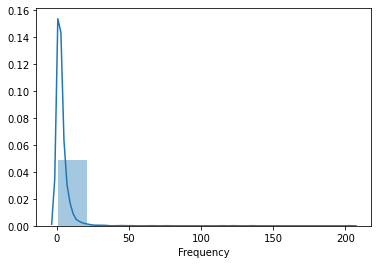

In [58]:
sns.distplot(a=customers['Frequency'],bins=10,hist=True)

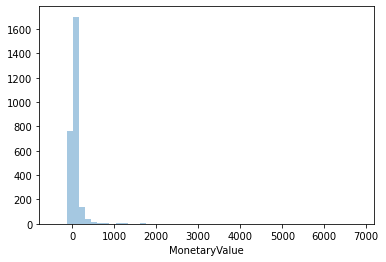

In [61]:
sns.distplot(a=customers['MonetaryValue'],bins=50,hist=True,kde=False)

 ### By using the transformation, we will have data that less skewed. The skewness value declines from 16.63 to 1.16. Therefore, we can transform the RFM table with this code,

In [62]:
from scipy import stats

In [63]:
customers_fix=pd.DataFrame()

In [64]:
customers_fix

""


In [70]:
np.cbrt(customers['MonetaryValue'])

CustomerID
12347.0    5.107026
12348.0    4.944452
12349.0    6.787853
12352.0    4.324076
12354.0    3.217225
             ...   
18265.0    3.408514
18272.0    5.907565
18274.0   -1.669108
18283.0    4.273206
18287.0    4.087250
Name: MonetaryValue, Length: 2690, dtype: float64

In [73]:
customers_fix['Recency']=stats.boxcox(x=customers['Recency'])[0]
customers_fix['Frequency']=stats.boxcox(x=customers['Frequency'])[0]
customers_fix['MonetaryValue']=pd.Series(np.cbrt(customers['MonetaryValue'])).values

In [74]:
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2685,8.093846,0.591193,3.408514
2686,0.762855,1.435599,5.907565
2687,4.394910,0.591193,-1.669108
2688,1.684124,1.615329,4.273206
2689,6.553285,1.017445,4.087250


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [79]:
scaler.fit(customers_fix)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
customers_normalized=scaler.transform(customers_fix)

In [81]:
customers_normalized

array([[-0.49691277,  1.01242554,  1.01750301],
       [ 1.23459337, -0.01741182,  0.92511465],
       [-0.96588266, -0.01741182,  1.97269038],
       ...,
       [-0.9975698 , -0.01741182, -2.83326622],
       [-1.71559842,  1.94900123,  0.54365651],
       [-0.42586316,  0.80102263,  0.43798027]])

In [83]:
customers_normalized.mean(axis=0)

array([ 9.31101540e-17, -9.31101540e-17,  2.00748134e-16])

In [84]:
customers_normalized.std(axis=0)

array([1., 1., 1.])

### To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide. The code will look like this,

In [85]:
from sklearn.cluster import KMeans

In [86]:
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k]=kmeans.inertia_

In [87]:
sse

{1: 8070.000000000001,
 2: 4736.746730379085,
 3: 3785.924228843044,
 4: 3121.9327812369766,
 5: 2617.6736287921667,
 6: 2284.202319769098,
 7: 1955.249344923566,
 8: 1744.9403029718274,
 9: 1594.653479384223,
 10: 1466.6174604068349}

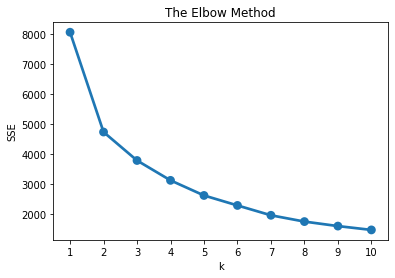

In [90]:
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### Based on our observation, the k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Therefore, our best model for the data is K-Means with the number of clusters is 3.

In [91]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(customers_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [92]:
model.labels_

array([1, 0, 1, ..., 2, 1, 1])

In [93]:
model.labels_.shape

(2690,)

In [97]:
customers.head(6)

,Recency,Frequency,MonetaryValue,Clusters
CustomerID,,,,
12347.0,39,5,133.20,1
12348.0,249,2,120.88,0
12349.0,19,2,312.75,1
12352.0,72,5,80.85,1
12354.0,232,2,33.30,0
12357.0,33,4,298.32,1


In [95]:
customers['Clusters']=model.labels_

In [96]:
customers.head(6)

,Recency,Frequency,MonetaryValue,Clusters
CustomerID,,,,
12347.0,39,5,133.20,1
12348.0,249,2,120.88,0
12349.0,19,2,312.75,1
12352.0,72,5,80.85,1
12354.0,232,2,33.30,0
12357.0,33,4,298.32,1


In [122]:
customers.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']})

Recency Frequency MonetaryValue      
                mean      mean          mean count
Clusters                                          
0         226.405434  1.643678     28.690000   957
1          45.588745  7.708874    165.794556   924
2          46.817058  1.611867     21.511434   809

### Besides that, we can analyze the segments using snake plot. By using this plot, we can have a good visualization from the data on how the cluster differs from each other. We can make the plot by using this code,

In [101]:
df_normalized=pd.DataFrame(data=customers_normalized,columns=['Recency','Frequency','MonetaryValue'])

In [102]:
df_normalized.head()

,Recency,Frequency,MonetaryValue
0,-0.496913,1.012426,1.017503
1,1.234593,-0.017412,0.925115
2,-0.965883,-0.017412,1.972690
3,-0.017802,1.012426,0.572565
4,1.151289,-0.017412,-0.056441


In [103]:
customers.index

Float64Index([12347.0, 12348.0, 12349.0, 12352.0, 12354.0, 12357.0, 12358.0,
              12359.0, 12360.0, 12362.0,
              ...
              18252.0, 18257.0, 18259.0, 18260.0, 18263.0, 18265.0, 18272.0,
              18274.0, 18283.0, 18287.0],
             dtype='float64', name='CustomerID', length=2690)

In [104]:
df_normalized['ID']=customers.index

In [110]:
df_normalized['Cluster'] = customers.reset_index()['Clusters']

In [111]:
df_normalized

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.496913,1.012426,1.017503,12347.0,1
1,1.234593,-0.017412,0.925115,12348.0,0
2,-0.965883,-0.017412,1.972690,12349.0,1
3,-0.017802,1.012426,0.572565,12352.0,1
4,1.151289,-0.017412,-0.056441,12354.0,0
...,...,...,...,...,...
2685,-0.017802,-0.017412,0.052265,18265.0,2
2686,-1.959623,1.603908,1.472436,18272.0,1
2687,-0.997570,-0.017412,-2.833266,18274.0,2
2688,-1.715598,1.949001,0.543657,18283.0,1


In [113]:
df_nor_melt=pd.melt(df_normalized.reset_index(),id_vars=['ID','Cluster'],value_vars=['Recency','Frequency','MonetaryValue'],
        var_name='Attribute',value_name='Value')

In [114]:
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,1,Recency,-0.496913
1,12348.0,0,Recency,1.234593
2,12349.0,1,Recency,-0.965883
3,12352.0,1,Recency,-0.017802
4,12354.0,0,Recency,1.151289


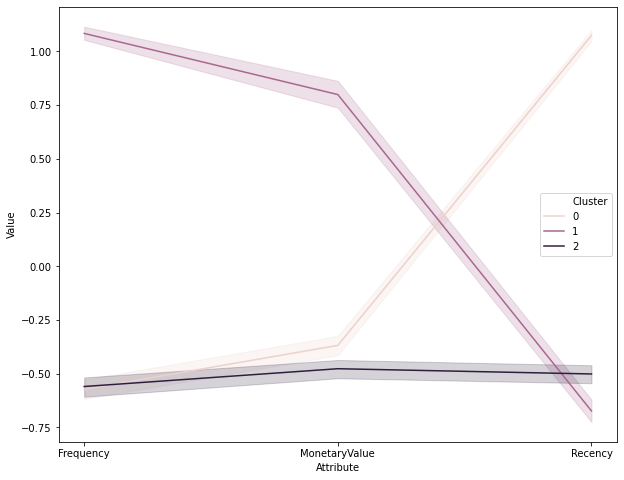

In [120]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_nor_melt,x='Attribute',y='Value',hue='Cluster');